___
# PROJETO 1

## <font color='red'>Giovanni Ranieri</font>
___

## <font color='blue'>TÍTULO DO SEU PROJETO</font>

## Introdução

Descreva aqui a motivação para escolha dos grupos e o que pretende analisar!

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Giovanni Ranieri\Documents\2º Semestre\Ciência de Dados


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
#pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

In [6]:
estrutura.columns
pnad2014.columns = estrutura.iloc[:,0]

In [7]:
pnad2014["regiao"] = pd.Series(len(pnad2014))



In [8]:
pnad2014.regiao[pnad2014.UF==35] = "Sudeste"
pnad2014.regiao[pnad2014.UF==31] = "Sudeste"
pnad2014.regiao[pnad2014.UF==32] = "Sudeste"
pnad2014.regiao[pnad2014.UF==33] = "Sudeste"
pnad2014.regiao[pnad2014.UF==41] = "Sul"
pnad2014.regiao[pnad2014.UF==42] = "Sul"
pnad2014.regiao[pnad2014.UF==43] = "Sul"
pnad2014.regiao[pnad2014.UF==11] = "Norte"
pnad2014.regiao[pnad2014.UF==12] = "Norte"
pnad2014.regiao[pnad2014.UF==13] = "Norte"
pnad2014.regiao[pnad2014.UF==14] = "Norte"
pnad2014.regiao[pnad2014.UF==15] = "Norte"
pnad2014.regiao[pnad2014.UF==16] = "Norte"
pnad2014.regiao[pnad2014.UF==17] = "Norte"
pnad2014.regiao[pnad2014.UF==21] = "Norte"
pnad2014.regiao[pnad2014.UF==22] = "Nordeste"
pnad2014.regiao[pnad2014.UF==23] = "Nordeste"
pnad2014.regiao[pnad2014.UF==24] = "Nordeste"
pnad2014.regiao[pnad2014.UF==25] = "Nordeste"
pnad2014.regiao[pnad2014.UF==26] = "Nordeste"
pnad2014.regiao[pnad2014.UF==27] = "Nordeste"
pnad2014.regiao[pnad2014.UF==28] = "Nordeste"
pnad2014.regiao[pnad2014.UF==29] = "Nordeste"
pnad2014.regiao[pnad2014.UF==50] = "CentroO"
pnad2014.regiao[pnad2014.UF==51] = "CentroO"
pnad2014.regiao[pnad2014.UF==52] = "CentroO"
pnad2014.regiao[pnad2014.UF==53] = "CentroO"

C:\Users\Giovanni Ranieri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Giovanni Ranieri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Giovanni Ranieri\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Giovanni Ranie

In [9]:
#Homem x Mulher
pnad2014.V0302 = pnad2014.V0302.astype('category')
pnad2014.V0302.cat.categories = ('Masculino','Feminino')

In [10]:
#Estado Civil
pnad2014.V4011 = pnad2014.V4011.astype("category")
pnad2014.V4011.cat.categories = ('casados','Separados Judicialmente','Divorciado(a)','Viuvo(a)','Solteiro(a)')

In [11]:
#Curso mais elevado
pnad2014.V6007 = pnad2014.V6007.astype('category')
pnad2014.V6007.cat.categories = ('Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.')

In [12]:
#Salário
pnad2014.V4743 = pnad2014.V4743.astype('category')
pnad2014.V4743.cat.categories = ('Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até 2 salários mínimos','Mais de 2 até 3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos','Sem declaração','nao Aplicavel')

In [13]:
#n° de horas habitualmente trabalhadas por semana
#pnad2014.V9058

In [14]:
#Faixa rendimento mensal domiciliar
#pnad2014.V4743 

In [15]:
#Aposentado?
pnad2014.V9122 = pnad2014.V9122.astype('category')
pnad2014.V9122.cat.categories = ('Sim','Nao')

In [16]:
#N° de horas dedicadas por semana aos afazeres domesticos
#pnad2014.V9921

In [17]:
pnad2014.UF = pnad2014.UF.astype('category')
pnad2014.UF.cat.categories = ('Rondônia','Acre','Amazonas','Roraima','Para','Amapa','Tocantins','Mananhao','Piaui','Ceara','Rio Grande do Norte','Paraiba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de Janeiro','Sao Paulo','Parana','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goias','Distrito Federal')


In [18]:
pnad2014.V9122 = pnad2014.V9122.astype('category')
pnad2014.V9122.cat.categories = ('Aposentado','Nao_Aposentado')


In [19]:
aposentados = pnad2014[pnad2014.V9122 == 'Aposentado']


In [20]:
HomenApos = aposentados[aposentados.V0302 == 'Masculino']
MulherApos = aposentados[aposentados.V0302 == 'Feminino']


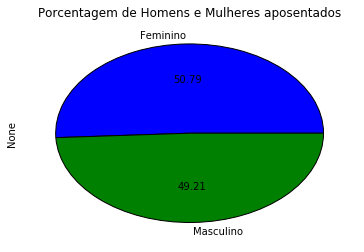

In [21]:
sexoAps = aposentados.V0302.value_counts()
sexoAps.plot(kind='pie',autopct="%0.2f",legend=False,title="Porcentagem de Homens e Mulheres aposentados")

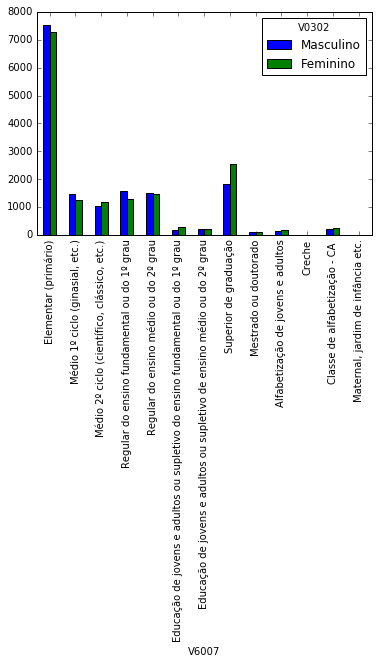

In [22]:
educacao_apos = pd.crosstab(aposentados.V6007,aposentados.V0302)
educacao_apos.plot.bar()

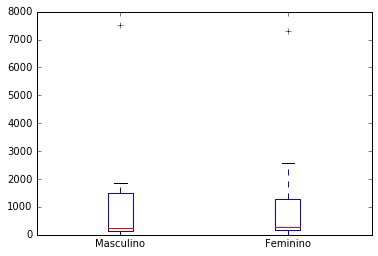

In [23]:
Horas_trabaladas_p_semana = pd.crosstab(aposentados.V6007,aposentados.V0302)
Horas_trabaladas_p_semana.plot.box()

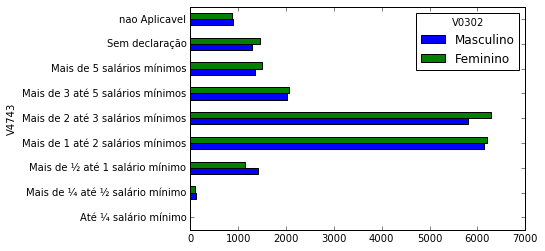

In [24]:
rendimento_mensal_p_capita = pd.crosstab(aposentados.V4743,aposentados.V0302)
rendimento_mensal_p_capita.plot.barh()

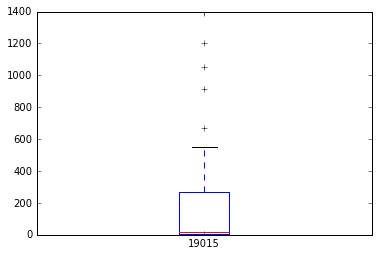

In [25]:
#Homens
horas_trabalhadas_p_semana_afazeres_domesticos_H = pd.crosstab(HomenApos.V9921,len(HomenApos))
horas_trabalhadas_p_semana_afazeres_domesticos_H.plot.box()

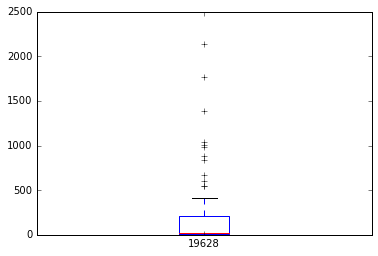

In [26]:
#Mulheres
horas_trabalhadas_p_semana_afazeres_domesticos_F = pd.crosstab(MulherApos.V9921,len(MulherApos))
horas_trabalhadas_p_semana_afazeres_domesticos_F.plot.box()

___

___
## Conclusão 

## Em relação a porcentagem de homens e mulheres aposentados

O valor da comparação de homens e mulheres aposentados é muito próxima, o que facilita para outras análises. Um comentário é que as mulheres superam um pouco o valor, e podemos deduzir que isso ocorre devido ao fato de terem uma estimativa de vida maior.

## Ensino Superior entre homens e mulheres

As mulheres superam os homens em questão de ensino superior, assim podemos concluir que empregos não são problemas para o público feminimo, porém ainda enfretamos algumas dificuldades na sociedade atual.


## Horas de trablho na semana entre homens e mulheres

A média entre os dois sexos é praticamente igual, desse modo podemos afirmar que na aposentadoria a disparidade não é grande.

## Renda per capita

As Mulheres ganham mais, desse modo podemos afirmar que a aposentadoria delas é consideravelmente melhor do que a dos homens


## Horas de trabalho doméstico na semana

As mulheres possuem um valor um pouco maior, já que muitas vezes tem filhos para cuidar, porém não podemos excluir os pais que cuidam dos filhos. A sociedade atual está em mudança, pois a comparação de valores passados mostra uma grande disparidade nessa variável, em que a mulher deixava de trabalhar para cuidar dos filhos e sua aposentaria não era boa. 